In [1]:
import pandas as pd
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# 1. Cargar y explorar la data
df = pd.read_csv('taller2_MLE.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   edad                   5000 non-null   int64  
 1   segmento               5000 non-null   object 
 2   saldo_total            5000 non-null   float64
 3   numero_productos       5000 non-null   int64  
 4   visitas_app_mes        5000 non-null   int64  
 5   usa_web                5000 non-null   int64  
 6   usa_tarjeta_credito    5000 non-null   int64  
 7   reclamos_6m            5000 non-null   int64  
 8   satisfaccion_encuesta  5000 non-null   float64
 9   tasa_credito_personal  5000 non-null   float64
 10  rango_ingresos         5000 non-null   object 
 11  region                 5000 non-null   object 
 12  cerrara_cuenta         5000 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 507.9+ KB


In [4]:
clf1 = setup(
    data=df,
    target='cerrara_cuenta',
    session_id=777,
    categorical_features=['segmento', 'rango_ingresos', 'region'],
    bin_numeric_features=['usa_web', 'usa_tarjeta_credito'],
    fix_imbalance=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.8,
    transformation=True,
    transformation_method='yeo-johnson'
)


,Description,Value
0,Session id,777
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(7518, 20)"
5,Transformed train set shape,"(6018, 20)"
6,Transformed test set shape,"(1500, 20)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


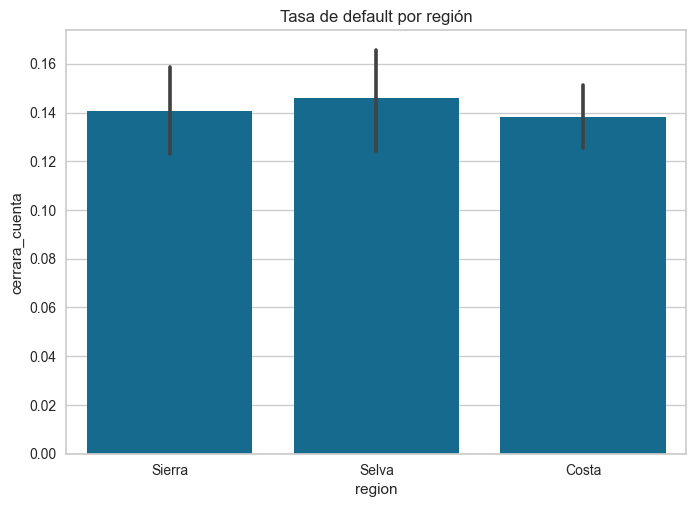

In [6]:
# 2. Análisis exploratorio NO trivial: identificar patrones por region
sns.barplot(x='region', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por región")
plt.show()


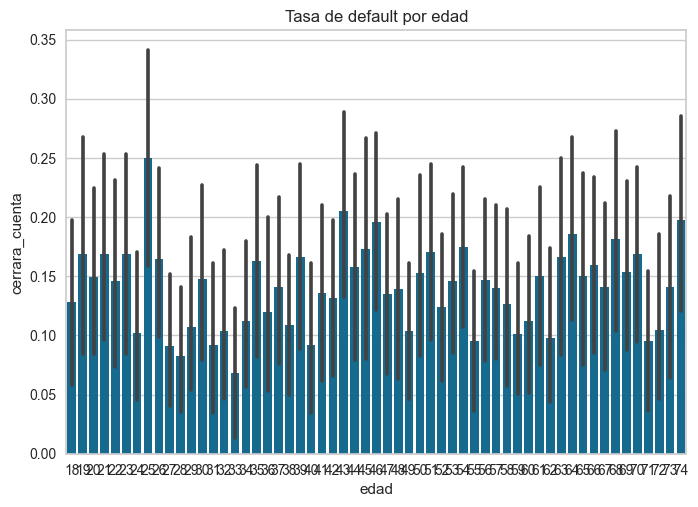

In [14]:
# 2. Análisis exploratorio NO trivial: identificar patrones por edad
sns.barplot(x='edad', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por edad")
plt.show()

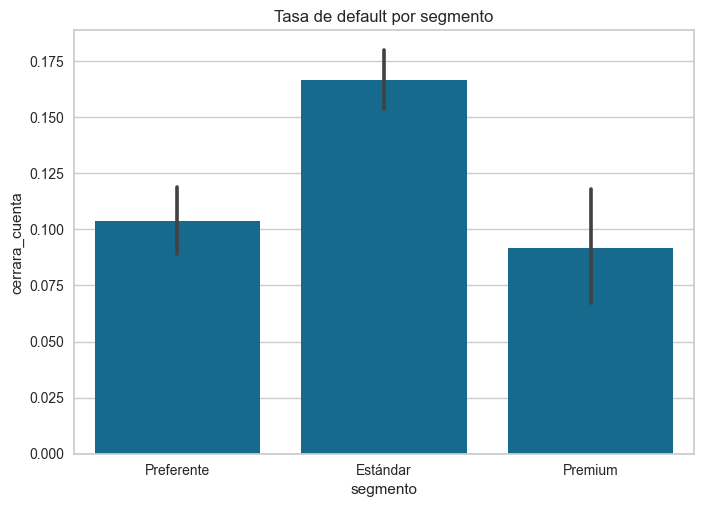

In [7]:
# 2. Análisis exploratorio NO trivial: identificar patrones por segmento
sns.barplot(x='segmento', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por segmento")
plt.show()

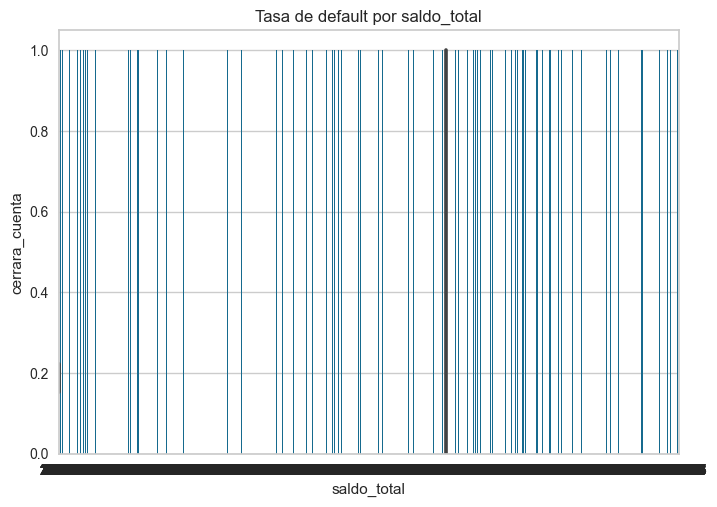

In [15]:
# 2. Análisis exploratorio NO trivial: identificar patrones por saldo_total
sns.barplot(x='saldo_total', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por saldo_total")
plt.show()

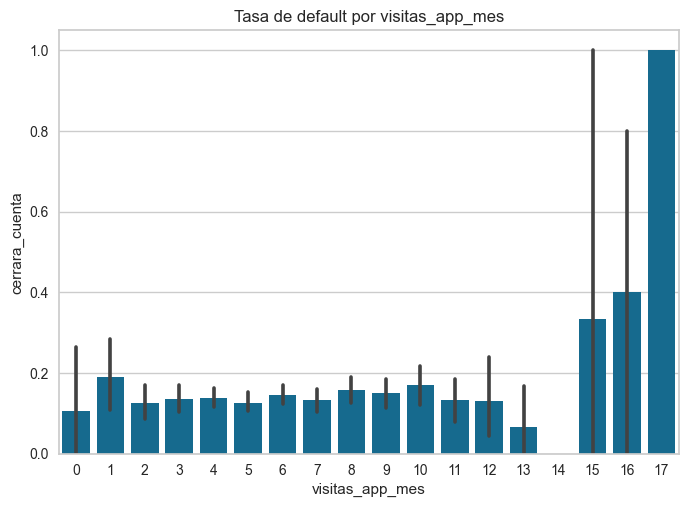

In [17]:
# 2. Análisis exploratorio NO trivial: identificar patrones por visitas_app_mes
sns.barplot(x='visitas_app_mes', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por visitas_app_mes")
plt.show()

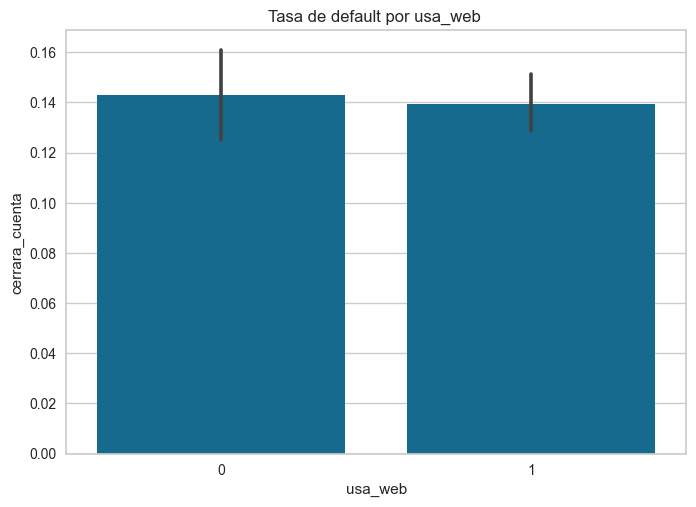

In [19]:
# 2. Análisis exploratorio NO trivial: identificar patrones por usa_web 
sns.barplot(x='usa_web', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por usa_web ")
plt.show()

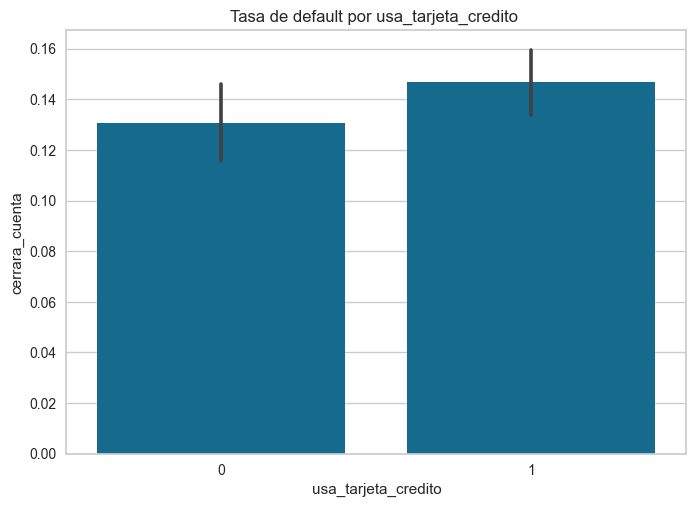

In [20]:
# 2. Análisis exploratorio NO trivial: identificar patrones por usa_tarjeta_credito 
sns.barplot(x='usa_tarjeta_credito', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por usa_tarjeta_credito ")
plt.show()

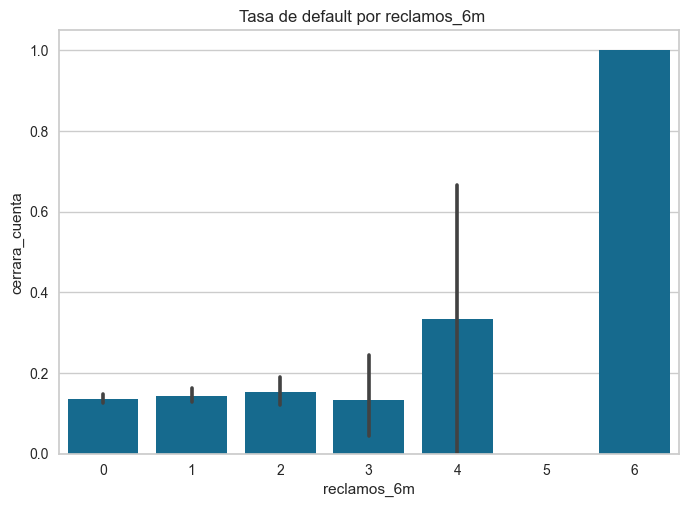

In [21]:
# 2. Análisis exploratorio NO trivial: identificar patrones por reclamos_6m   
sns.barplot(x='reclamos_6m', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por reclamos_6m   ")
plt.show()

In [ ]:
# 2. Análisis exploratorio NO trivial: identificar patrones por numero_productos
sns.barplot(x='numero_productos', y='cerrara_cuenta', data=df)
plt.title("Tasa de default por numero_productos")
plt.show()

In [9]:
porcentaje_fuga = df['cerrara_cuenta'].mean() * 100
print(f"Porcentaje de clientes que cerraron su cuenta: {porcentaje_fuga:.2f}%")
print("¿Está balanceado?:", "NO" if porcentaje_fuga < 40 else "SÍ")

Porcentaje de clientes que cerraron su cuenta: 14.04%
¿Está balanceado?: NO


1️⃣ Porcentaje de clientes que cerraron su cuenta: 14.04%
¿Está balanceado?: NO


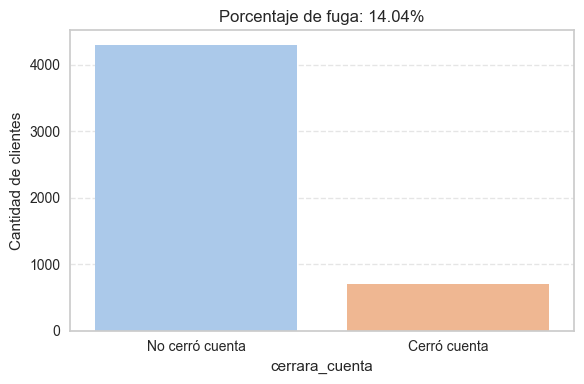

In [10]:
# Porcentaje de fuga y balanceo
porcentaje_fuga = df['cerrara_cuenta'].mean() * 100
print(f"1️⃣ Porcentaje de clientes que cerraron su cuenta: {porcentaje_fuga:.2f}%")
print("¿Está balanceado?:", "NO" if porcentaje_fuga < 40 else "SÍ")

# Gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Contar cantidad de cada clase
fuga_counts = df['cerrara_cuenta'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=fuga_counts.index, y=fuga_counts.values, palette="pastel")

# Etiquetas
plt.xticks([0, 1], ['No cerró cuenta', 'Cerró cuenta'])
plt.ylabel('Cantidad de clientes')
plt.title(f'Porcentaje de fuga: {porcentaje_fuga:.2f}%')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# 3. Segmentar por negocios donde el default es mayor
df_seg = df[df['cerrara_cuenta'].isin(['Agrícola', 'Comercio'])]



KeyError: 'tipo_negocio'

In [ ]:
# 4. Configurar PyCaret con enfoque segmentado
exp = setup(data=df_seg,
            target='default',
            session_id=999,
            categorical_features=['zona', 'tipo_negocio'],
            ignore_features=['cuotas_pagadas'],
            remove_multicollinearity=True,
            multicollinearity_threshold=0.8,
            normalize=True)



NameError: name 'df_seg' is not defined

In [10]:
from pycaret.classification import setup

# 4️⃣ Configurar PyCaret con enfoque segmentado
exp = setup(
    data=df_seg,
    target='default',
    session_id=999,
    categorical_features=['zona', 'tipo_negocio'],
    ignore_features=['cuotas_pagadas'],
    remove_multicollinearity=True,
    multicollinearity_threshold=0.8,
    normalize=True,
    transformation=True,  # Mejora la distribución de variables numéricas
    #silent=True,          # Para evitar preguntas interactivas
    fix_imbalance=True,   # Para problemas con clases desbalanceadas
    verbose=True          # Para ver el log paso a paso
)


NameError: name 'df_seg' is not defined

In [13]:
# 5. Buscar el mejor modelo considerando AUC y Recall
best = compare_models(sort='Recall')



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2531,0.5320,0.8858,0.1478,0.2515,0.0154,0.0301,0.0370
svm,SVM - Linear Kernel,0.5134,0.6034,0.5712,0.1973,0.2341,0.0562,0.0744,0.0410
nb,Naive Bayes,0.6586,0.5973,0.4196,0.1836,0.2551,0.0753,0.0868,0.0340
lr,Logistic Regression,0.7049,0.6202,0.4011,0.2115,0.2765,0.1136,0.1227,0.6820
knn,K Neighbors Classifier,0.5751,0.4964,0.3766,0.1358,0.1990,-0.0085,-0.0111,0.3140
dt,Decision Tree Classifier,0.7451,0.5135,0.1915,0.1598,0.1739,0.0250,0.0251,0.0370
ridge,Ridge Classifier,0.8111,0.6276,0.1811,0.2628,0.2126,0.1095,0.1129,0.0340
lda,Linear Discriminant Analysis,0.8500,0.6342,0.0469,0.3202,0.0796,0.0428,0.0688,0.0390
et,Extra Trees Classifier,0.8509,0.5852,0.0224,0.2127,0.0402,0.0137,0.0257,0.1290
lightgbm,Light Gradient Boosting Machine,0.8523,0.5967,0.0203,0.1679,0.0358,0.0128,0.0173,0.2010


In [15]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1400,0.5649,1.0000,0.1400,0.2456,0.0000,0.0000
1,0.2229,0.5136,0.9592,0.1483,0.2568,0.0189,0.0738
2,0.1800,0.4765,0.8367,0.1281,0.2222,-0.0272,-0.1118
3,0.5743,0.5480,0.5918,0.1835,0.2802,0.0845,0.1138
4,0.4029,0.6071,0.7755,0.1610,0.2667,0.0453,0.0871
5,0.1771,0.4980,1.0000,0.1454,0.2539,0.0125,0.0792
6,0.1400,0.5455,1.0000,0.1400,0.2456,0.0000,0.0000
7,0.2314,0.5319,0.8776,0.1405,0.2423,0.0012,0.0040
8,0.2029,0.5045,0.8776,0.1361,0.2356,-0.0090,-0.0345


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6514,0.5626,0.3878,0.1712,0.2375,0.0537,0.0612
1,0.5800,0.5131,0.4082,0.1449,0.2139,0.0092,0.0115
2,0.6286,0.6294,0.5306,0.1955,0.2857,0.1020,0.1252
3,0.6800,0.6431,0.4286,0.2000,0.2727,0.1011,0.1132
4,0.6429,0.4981,0.3673,0.1607,0.2236,0.0358,0.0410
5,0.6229,0.5819,0.3878,0.1570,0.2235,0.0303,0.0357
6,0.6743,0.5903,0.3469,0.1717,0.2297,0.0522,0.0574
7,0.6686,0.6162,0.4898,0.2087,0.2927,0.1199,0.1385
8,0.6343,0.5798,0.4082,0.1681,0.2381,0.0496,0.0581


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


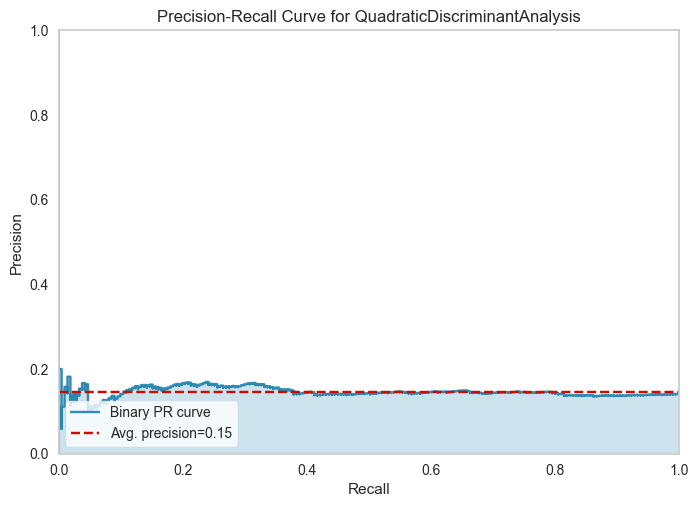

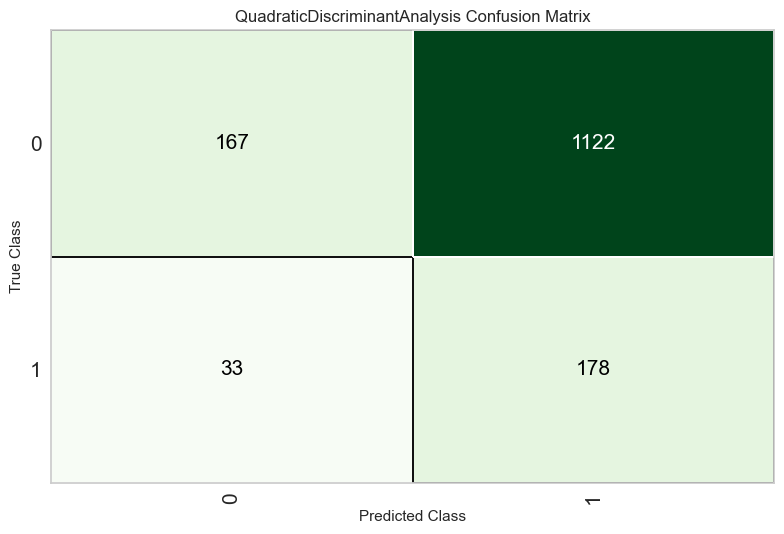

In [17]:
# 6. Ajuste fino y visualización
qda = tune_model(qda, optimize='Recall')
plot_model(qda, plot='pr')  # Precision-Recall
plot_model(qda, plot='confusion_matrix')

In [ ]:
# 6. Evaluación de sensibilidad para reducir falsos negativos
final_model = tune_model(best, optimize='Recall')
plot_model(final_model, plot='confusion_matrix')
plot_model(final_model, plot='feature')



In [ ]:
# 7. Interpretación por zona
interpret_model(final_model, plot='summary')

# 8. Simular nuevo crédito (no usar todo el df)
nuevo_cliente = pd.DataFrame({
    'zona': ['Selva'],
    'tipo_negocio': ['Agrícola'],
    'monto_credito': [4500],
    'mujer_emprendedora': [1],
    'hijos': [3]
})
pred = predict_model(final_model, data=nuevo_cliente)
print(pred)

# 9. Guardar para pipeline rural
save_model(final_model, 'modelo_default_rural_selva')

In [ ]:
# 7. Interpretación por zona
interpret_model(final_model, plot='summary')



In [ ]:
# 8. Simular nuevo crédito (no usar todo el df)
nuevo_cliente = pd.DataFrame({
    'zona': ['Selva'],
    'tipo_negocio': ['Agrícola'],
    'monto_credito': [4500],
    'mujer_emprendedora': [1],
    'hijos': [3]
})
pred = predict_model(final_model, data=nuevo_cliente)
print(pred)



In [ ]:
# 9. Guardar para pipeline rural
save_model(final_model, 'modelo_default_rural_selva')